### cosine similarity + minmax scaler

Gewichten voor gebruiker 9225240: {'average_altitude_change': 0.035008508445380004, 'average_distance': 0.049003291778922, 'average_condition_value': 0.9159881997756961, 'distance_to_user': 1.0}


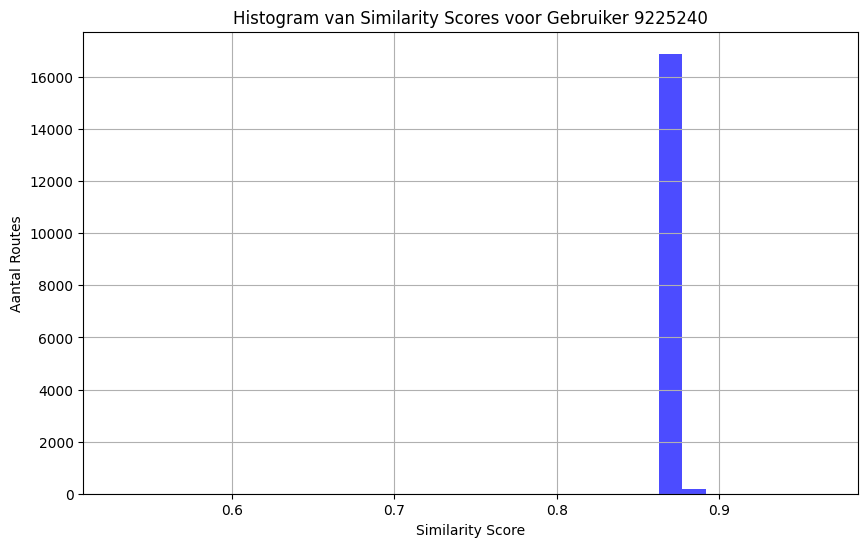

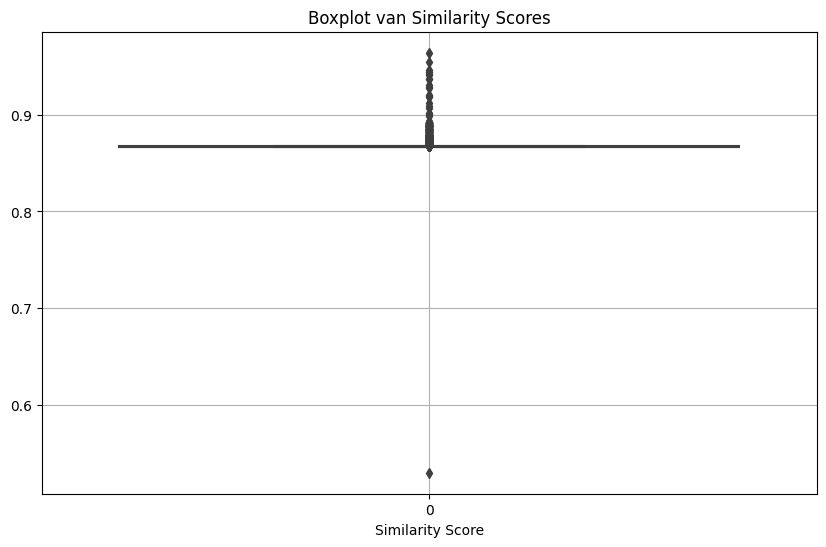

,latitude,longitude,altitude,sport,id,heart_rate,timestamp,speed,distance,altitude_change,...,average_condition_value,mean_altitude,mean_latitude,mean_longitude,orig_altitude_change,orig_distance,orig_mean_altitude,orig_average_condition_value,distance_to_user,similarity_score
3317,"[55.53346588276327, 55.53302817977965, 55.5319...","[9.776871968060732, 9.777195006608963, 9.77729...","[0.0, -0.2, -0.2, -0.2, 2.0, 3.2, 4.0, 5.2, 6....",bike,175999418,"[98, 101, 116, 122, 124, 129, 126, 122, 120, 1...","[1348415254, 1348415264, 1348415281, 134841529...","[15.8832, 23.778, 27.2232, 27.2232, 26.2476, 2...",0.332126,0.016689,...,0.731867,0.055517,55.491182,9.863459,64.0,57.997817,19.0724,6.369207,2.584019,0.963967
1133,"[55.50914947874844, 55.508710350841284, 55.507...","[9.883764199912548, 9.88381365314126, 9.883939...","[0.0, -0.8, 1.6, 4.2, 6.8, 6.8, 6.6, 7.4, 3.2,...",bike,203515722,"[96, 105, 114, 123, 125, 127, 129, 125, 120, 1...","[1371303144, 1371303155, 1371303178, 137130319...","[9.4536, 18.9468, 17.8524, 18.9972, 16.7076, 4...",0.478877,0.013299,...,0.780399,0.055325,55.442710,9.844091,51.0,83.624199,17.5696,6.791561,3.013027,0.954717
1128,"[55.60912588611245, 55.60912236571312, 55.6087...","[9.747052593156695, 9.749640924856067, 9.75212...","[3.4, 3.4, 3.6, 4.4, 6.0, 10.6, 14.4, 18.0, 18...",bike,214776218,"[87, 107, 113, 110, 117, 123, 126, 125, 113, 1...","[1373553484, 1373553512, 1373553533, 137355355...","[10.3572, 24.9336, 31.194, 26.7516, 27.7128, 2...",0.671568,0.016741,...,0.780399,0.054201,55.482516,9.823763,64.2,117.273043,8.7644,6.791561,2.854128,0.946288
3316,"[55.53345590829849, 55.53345590829849, 55.5334...","[9.779932871460915, 9.779932871460915, 9.78034...","[0.2, 1.2, 3.4, 5.0, 6.8, 7.6, 9.4, 9.8, 9.8, ...",bike,175999346,"[108, 117, 119, 125, 131, 139, 139, 133, 124, ...","[1351448846, 1351448858, 1351448863, 135144887...","[18.8496, 18.2628, 18.8964, 19.0836, 19.9836, ...",0.256019,0.018880,...,0.731867,0.054599,55.495567,9.826264,72.4,44.707679,11.8780,6.369207,3.772017,0.944520
1126,"[55.50909080542624, 55.509061217308044, 55.508...","[9.883734108880162, 9.883737964555621, 9.88375...","[0.0, 0.0, 0.6000000000000001, 1.6, 2.4, 2.4, ...",bike,225777933,"[98, 98, 100, 100, 101, 106, 109, 110, 111, 11...","[1375650705, 1375650706, 1375650710, 137565071...","[11.0772, 11.7324, 13.4568, 16.2216, 18.5544, ...",0.101696,0.007249,...,0.780399,0.053716,55.503700,9.836353,27.8,17.759058,4.9628,6.791561,4.267134,0.942271


In [3]:
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
from geopy.distance import geodesic
import folium
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns 

# Pad naar de bestanden
user_profiles_path = '../Data/Fietsdata/kleinebestanden/fiets_gebruikersprofielen3.json'
routes_path = '../Data/Fietsdata/kleinebestanden/fietsroutes_aangepast_met_gebruikers.json'

user_profiles_df = pd.read_json(user_profiles_path, lines=True)
routes_df = pd.read_json(routes_path, lines=True)



# Stap 2: Preprocessing van de routegegevens
routes_df['mean_altitude'] = routes_df['altitude'].apply(np.mean)
routes_df['mean_latitude'] = routes_df['latitude'].apply(np.mean)
routes_df['mean_longitude'] = routes_df['longitude'].apply(np.mean)


# Bewaar de originele waarden in aparte kolommen
user_profiles_df['orig_average_speeds'] = user_profiles_df['average_speeds']
user_profiles_df['orig_average_altitude_changes'] = user_profiles_df['average_altitude_changes']
user_profiles_df['orig_average_distances'] = user_profiles_df['average_distances']
user_profiles_df['orig_average_condition_value'] = user_profiles_df['average_condition_value']

routes_df['orig_altitude_change'] = routes_df['altitude_change']
routes_df['orig_distance'] = routes_df['distance']
routes_df['orig_mean_altitude'] = routes_df['mean_altitude']
routes_df['orig_average_condition_value'] = routes_df['average_condition_value']

# Voeg de meest voorkomende locatie van de gebruiker toe aan de DataFrame
user_profiles_df[['most_common_lat', 'most_common_lon']] = pd.DataFrame(user_profiles_df['average_location'].tolist(), index=user_profiles_df.index)

# Normaliseer de kenmerken behalve coördinaten met Min-Max schaling
scaler = MinMaxScaler()
user_profiles_df[['average_speeds', 'average_altitude_changes', 'average_distances', 'average_condition_value']] = scaler.fit_transform(user_profiles_df[['average_speeds', 'average_altitude_changes', 'average_distances', 'average_condition_value']])
routes_df[['altitude_change', 'distance', 'mean_altitude', 'average_condition_value']] = scaler.fit_transform(routes_df[['altitude_change', 'distance', 'mean_altitude', 'average_condition_value']])

# Stap 3: Bepaal gewichten voor gebruikerskenmerken

gewichten = {}
for index, row in user_profiles_df.iterrows():
    user_id = row['userId']
    altitude_weight = row['weight_std_altitude_change']
    distance_weight = row['weight_std_distance']
    condition_weight = row['weight_std_condition_value']
    gewichten[user_id] = {
        'average_altitude_change': altitude_weight, 
        'average_distance': distance_weight, 
        'average_condition_value': condition_weight,
        'distance_to_user': 1.0}

# Stap 4: Definieer aanbevelingsfunctie voor routes

def recommend_routes_for_user_corrected(user_id, user_profiles_df, routes_df, top_n=10):
    user_data = user_profiles_df[user_profiles_df['userId'] == user_id]
    user_location = (user_data['most_common_lat'].iloc[0], user_data['most_common_lon'].iloc[0])


    # Bereken de afstand tussen de gebruiker en elke route
    def calculate_distance_to_user(row):
        route_location = (row['mean_latitude'], row['mean_longitude'])
        distance_to_user = geodesic(user_location, route_location).kilometers
        return distance_to_user

    routes_df['distance_to_user'] = routes_df.apply(calculate_distance_to_user, axis=1)

    # Functie om de cosine similarity te berekenen
    def calculate_cosine_similarity(row):
        user_values = user_data[['average_altitude_changes', 'average_distances', 'average_condition_value']].values[0]
        route_values = row[['altitude_change', 'distance', 'distance_to_user', 'average_condition_value']]

        # Bereken de gewogen waarden
        gewogen_user_values = np.array([
            user_values[0] * gewichten[user_id]['average_altitude_change'],
            user_values[1] * gewichten[user_id]['average_distance'],
            user_values[2] * gewichten[user_id]['average_condition_value'],
            gewichten[user_id]['distance_to_user']])

        gewogen_route_values = np.array([
            route_values['altitude_change'],
            route_values['distance'],
            route_values['average_condition_value'],
            route_values['distance_to_user']])

        # Cosine similarity berekenen
        return cosine_similarity([gewogen_user_values], [gewogen_route_values])[0][0]


    # Pas de cosine similarity functie toe en sla de score op
    routes_df['similarity_score'] = routes_df.apply(calculate_cosine_similarity, axis=1)
# Selecteer de routes met de hoogste cosine similarity scores
    recommended_routes = routes_df.sort_values(by='similarity_score', ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    plt.hist(routes_df['similarity_score'], bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram van Similarity Scores voor Gebruiker {user_id}')
    plt.xlabel('Similarity Score')
    plt.ylabel('Aantal Routes')
    plt.grid(True)
    plt.show()

    # Aan het einde van je script, na het genereren van het histogram
    plt.figure(figsize=(10, 6))
    sns.boxplot(routes_df['similarity_score'])
    plt.title('Boxplot van Similarity Scores')
    plt.xlabel('Similarity Score')
    plt.grid(True)
    plt.show()
    # Stap 5: Creëer een kaart met de locatie van de gebruiker en de routes
    user_data = user_profiles_df[user_profiles_df['userId'] == sample_user_id].iloc[0]
    user_popup_info = f"UserID: {sample_user_id}<br>" \
                    f"Average Altitude Change: {user_data['orig_average_altitude_changes']}<br>" \
                    f"Average Distance: {user_data['orig_average_distances']}<br>" \
                    f"Average Condition Value: {user_data['orig_average_condition_value']}"


    map_obj = folium.Map(location=user_location, zoom_start=12)
    folium.Marker(user_location, popup=user_popup_info).add_to(map_obj)

    # Definieer een lijst met kleuren
    colors = ["red", "blue", "green", "purple", "orange"]

    for index, route in enumerate(recommended_routes.iterrows()):
        _, route_data = route
        route_coords = list(zip(route_data['latitude'], route_data['longitude']))
        route_color = colors[index % len(colors)]
        route_popup_info = f"Route ID: {route_data['id']}<br>" \
                        f"User ID: {route_data['userId']}<br>" \
                        f"Altitude Change: {route_data['orig_altitude_change']}<br>" \
                        f"Distance: {route_data['orig_distance']}<br>" \
                        f"Condition Value: {route_data['orig_average_condition_value']}"
        folium.PolyLine(route_coords, color=route_color, weight=2.5, opacity=1, popup=route_popup_info).add_to(map_obj)

    display(map_obj) 


    return recommended_routes


# Stap 6: Test de functie voor een specifieke gebruiker


# sample_user_id = 10921915
# sample_user_id = 13693003
sample_user_id = 9225240
if sample_user_id in gewichten:
    print(f"Gewichten voor gebruiker {sample_user_id}: {gewichten[sample_user_id]}")
else:
    print(f"Geen gewichten gevonden voor gebruiker {sample_user_id}")

recommended_routes = recommend_routes_for_user_corrected(sample_user_id, user_profiles_df, routes_df)

recommended_routes.head()


### cosine similarity + no scaler

Gewichten voor gebruiker 13693003: {'average_altitude_change': 0.018097791640961, 'average_distance': 0.043645610309428005, 'average_condition_value': 0.938256598049609, 'distance_to_user': 1.0}


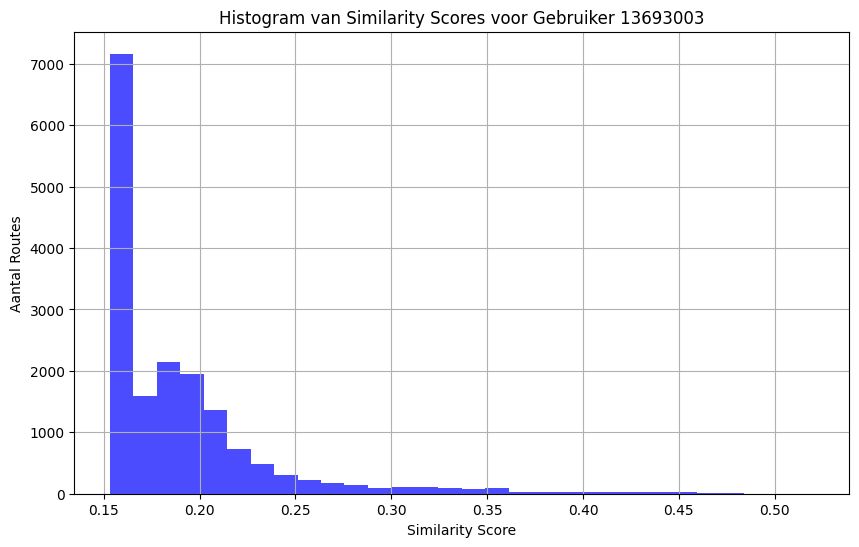

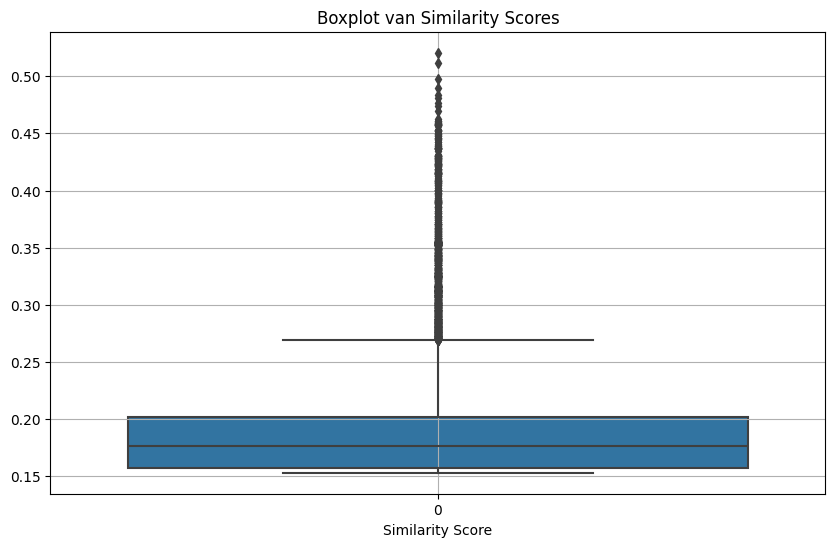

,latitude,longitude,altitude,sport,id,heart_rate,timestamp,speed,distance,altitude_change,userId,average_condition_value,mean_altitude,mean_latitude,mean_longitude,distance_to_user,similarity_score
444,"[52.23433001898229, 52.23433521576226, 52.2341...","[-0.260936608538031, -0.260964604094624, -0.26...","[12.4, 12.6, 15.8, 17.2, 19.6, 21.0, 23.2, 27....",bike,612920711,"[89, 89, 89, 90, 93, 97, 99, 102, 105, 104, 10...","[1443982728, 1443982729, 1443982741, 144398274...","[6.3324, 6.4188, 12.6324, 11.7288, 11.52, 12.1...",38.752947,40.0,13693003,6.259765,28.3096,52.373896,-0.234853,11.180058,0.520566
3332,"[52.220101403072476, 52.22020969726145, 52.220...","[0.144886979833245, 0.144925704225897, 0.14520...","[14.0, 14.2, 14.0, 12.8, 12.0, 11.6, 13.6, 14....",bike,584025314,"[75, 75, 92, 110, 118, 126, 134, 137, 139, 140...","[1439900263, 1439900268, 1439900272, 143990028...","[1.9188, 10.0944, 15.2676, 24.8148, 28.4328, 2...",40.964666,24.0,1367925,5.747887,13.6664,52.276181,0.054143,32.852620,0.511985
451,"[52.48362751677632, 52.483164835721254, 52.482...","[-0.475927731022238, -0.47592228278517706, -0....","[41.0, 40.4, 39.8, 39.2, 40.0, 41.4, 41.0, 40....",bike,578163448,"[149, 148, 149, 150, 154, 155, 154, 154, 156, ...","[1439134732, 1439134741, 1439134749, 143913476...","[11.6604, 20.2536, 21.6432, 29.7576, 35.046, 3...",57.913946,51.2,13693003,6.259765,61.3900,52.492030,-0.511452,13.120469,0.497985
447,"[52.395477555692196, 52.39559255540371, 52.394...","[0.266989013180136, 0.266540916636586, 0.26562...","[6.6, 8.0, 8.2, 8.0, 7.8, 7.4, 6.6, 6.0, 5.4, ...",bike,582928835,"[149, 149, 151, 153, 154, 151, 152, 155, 158, ...","[1439732168, 1439732187, 1439732203, 143973221...","[10.152, 7.3044, 26.1108, 29.4084, 34.4952, 29...",81.721768,35.0,13693003,6.259765,7.0096,52.432155,0.229903,37.971320,0.489545
460,"[52.45919485576451, 52.45923005975783, 52.4592...","[-0.27224144898355, -0.272270366549491, -0.272...","[4.0, 4.0, 4.2, 4.0, 4.0, 4.0, 3.8, 3.8, 4.0, ...",bike,548082458,"[83, 83, 86, 91, 95, 100, 103, 106, 113, 117, ...","[1435105119, 1435105120, 1435105124, 143510512...","[13.0824, 13.5252, 14.292, 17.8056, 23.4504, 2...",34.721385,49.4,13693003,6.259765,23.7096,52.441647,-0.273122,4.047766,0.483661


In [5]:
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
from geopy.distance import geodesic
import folium
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns 

# Pad naar de bestanden
user_profiles_path = '../Data/Fietsdata/kleinebestanden/fiets_gebruikersprofielen3.json'
routes_path = '../Data/Fietsdata/kleinebestanden/fietsroutes_aangepast_met_gebruikers.json'

user_profiles_df = pd.read_json(user_profiles_path, lines=True)
routes_df = pd.read_json(routes_path, lines=True)

# Stap 2: Preprocessing van de routegegevens
routes_df['mean_altitude'] = routes_df['altitude'].apply(np.mean)
routes_df['mean_latitude'] = routes_df['latitude'].apply(np.mean)
routes_df['mean_longitude'] = routes_df['longitude'].apply(np.mean)

# Voeg de meest voorkomende locatie van de gebruiker toe aan de DataFrame
user_profiles_df[['most_common_lat', 'most_common_lon']] = pd.DataFrame(user_profiles_df['average_location'].tolist(), index=user_profiles_df.index)


# Stap 3: Bepaal gewichten voor gebruikerskenmerken

gewichten = {}
for index, row in user_profiles_df.iterrows():
    user_id = row['userId']
    altitude_weight = row['weight_std_altitude_change']
    distance_weight = row['weight_std_distance']
    condition_weight = row['weight_std_condition_value']
    gewichten[user_id] = {
        'average_altitude_change': altitude_weight, 
        'average_distance': distance_weight, 
        'average_condition_value': condition_weight,
        'distance_to_user': 1.0}

# Stap 4: Definieer aanbevelingsfunctie voor routes

def recommend_routes_for_user_corrected(user_id, user_profiles_df, routes_df, top_n=10):
    user_data = user_profiles_df[user_profiles_df['userId'] == user_id]
    user_location = (user_data['most_common_lat'].iloc[0], user_data['most_common_lon'].iloc[0])


    # Bereken de afstand tussen de gebruiker en elke route
    def calculate_distance_to_user(row):
        route_location = (row['mean_latitude'], row['mean_longitude'])
        distance_to_user = geodesic(user_location, route_location).kilometers
        return distance_to_user

    routes_df['distance_to_user'] = routes_df.apply(calculate_distance_to_user, axis=1)

    # Functie om de cosine similarity te berekenen
    def calculate_cosine_similarity(row):
        user_values = user_data[['average_altitude_changes', 'average_distances', 'average_condition_value']].values[0]
        route_values = row[['altitude_change', 'distance', 'distance_to_user', 'average_condition_value']]

        # Bereken de gewogen waarden
        gewogen_user_values = np.array([
            user_values[0] * gewichten[user_id]['average_altitude_change'],
            user_values[1] * gewichten[user_id]['average_distance'],
            user_values[2] * gewichten[user_id]['average_condition_value'],
            gewichten[user_id]['distance_to_user']])

        gewogen_route_values = np.array([
            route_values['altitude_change'],
            route_values['distance'],
            route_values['average_condition_value'],
            route_values['distance_to_user']])

        # Cosine similarity berekenen
        return cosine_similarity([gewogen_user_values], [gewogen_route_values])[0][0]


    # Pas de cosine similarity functie toe en sla de score op
    routes_df['similarity_score'] = routes_df.apply(calculate_cosine_similarity, axis=1)
# Selecteer de routes met de hoogste cosine similarity scores
    recommended_routes = routes_df.sort_values(by='similarity_score', ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    plt.hist(routes_df['similarity_score'], bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram van Similarity Scores voor Gebruiker {user_id}')
    plt.xlabel('Similarity Score')
    plt.ylabel('Aantal Routes')
    plt.grid(True)
    plt.show()

    # Aan het einde van je script, na het genereren van het histogram
    plt.figure(figsize=(10, 6))
    sns.boxplot(routes_df['similarity_score'])
    plt.title('Boxplot van Similarity Scores')
    plt.xlabel('Similarity Score')
    plt.grid(True)
    plt.show()
    # Stap 5: Creëer een kaart met de locatie van de gebruiker en de routes
    user_data = user_profiles_df[user_profiles_df['userId'] == sample_user_id].iloc[0]
    user_popup_info = f"UserID: {sample_user_id}<br>" \
                    f"Average Altitude Change: {user_data['average_altitude_changes']}<br>" \
                    f"Average Distance: {user_data['average_distances']}<br>" \
                    f"Average Condition Value: {user_data['average_condition_value']}"

    # Voor satellietbeeld, vervang 'Stamen Terrain' met 'Stamen Toner' of 'Mapbox Satellite'
    # map_obj = folium.Map(location=user_location, zoom_start=12, tiles='Stamen Toner')
    mapbox_tileset = 'https://api.mapbox.com/styles/v1/mapbox/satellite-v9/tiles/256/{z}/{x}/{y}?access_token=pk.eyJ1IjoicnVwYXR0eW4iLCJhIjoiY2xyaWU2NG9nMDd6dzJtcDhwMHp5NWV3biJ9.bHb-trK3I9Z0H2uWRSoWow'
    map_obj = folium.Map(location=user_location, zoom_start=12, tiles=mapbox_tileset, attr='Mapbox')

    folium.Marker(user_location, popup=user_popup_info).add_to(map_obj)

    # Definieer een lijst met kleuren
    colors = ["red", "blue", "green", "purple", "orange"]

    for index, route in enumerate(recommended_routes.iterrows()):
        _, route_data = route
        route_coords = list(zip(route_data['latitude'], route_data['longitude']))
        route_color = colors[index % len(colors)]  # Wijs een kleur toe aan elke route
        route_popup_info = f"Route ID: {route_data['id']}<br>" \
                        f"User ID: {route_data['userId']}<br>" \
                        f"Average Altitude Change: {route_data['altitude_change']}<br>" \
                        f"Average Distance: {route_data['distance']}<br>" \
                        f"Average Condition Value: {route_data['average_condition_value']}"
        folium.PolyLine(route_coords, color=route_color, weight=2.5, opacity=1, popup=route_popup_info).add_to(map_obj)

    display(map_obj)  # Toon de kaart direct


    return recommended_routes


# Stap 6: Test de functie voor een specifieke gebruiker


# sample_user_id = 10921915
sample_user_id = 13693003
# sample_user_id = 9225240
if sample_user_id in gewichten:
    print(f"Gewichten voor gebruiker {sample_user_id}: {gewichten[sample_user_id]}")
else:
    print(f"Geen gewichten gevonden voor gebruiker {sample_user_id}")

recommended_routes = recommend_routes_for_user_corrected(sample_user_id, user_profiles_df, routes_df)

recommended_routes.head()


### euclidische afstand + minmax scaler

Gewichten voor gebruiker 9225240: {'average_altitude_change': 0.035008508445380004, 'average_distance': 0.049003291778922, 'average_condition_value': 0.9159881997756961, 'distance_to_user': 1.0}


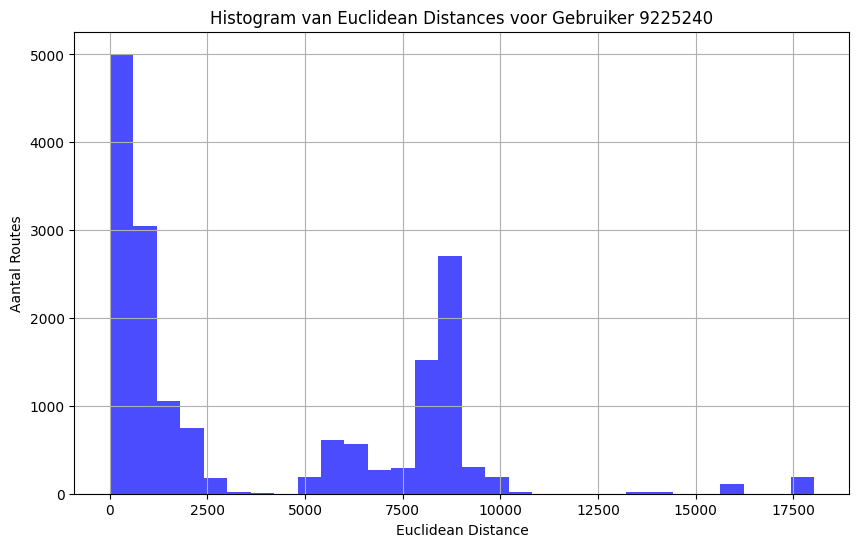

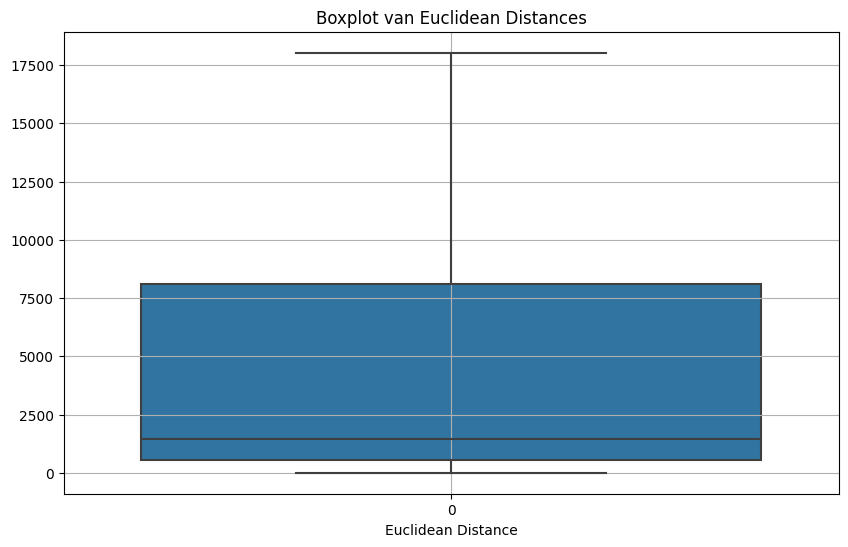

,latitude,longitude,altitude,sport,id,heart_rate,timestamp,speed,distance,altitude_change,...,average_condition_value,mean_altitude,mean_latitude,mean_longitude,orig_altitude_change,orig_distance,orig_mean_altitude,orig_average_condition_value,distance_to_user,euclidean_distance
1158,"[55.50911276601255, 55.50832914188504, 55.5078...","[9.883749363943934, 9.883832847699523, 9.88389...","[10.4, 11.0, 13.2, 15.4, 17.8, 19.4, 19.4, 18....",bike,73048235,"[93, 110, 118, 127, 136, 134, 135, 127, 126, 1...","[1342709068, 1342709085, 1342709094, 134270910...","[10.4256, 21.2004, 19.7496, 19.2636, 18.0648, ...",0.423464,0.016063,...,0.780399,0.056780,55.467985,9.859550,61.6,73.947784,28.9732,6.791561,0.090689,1.017970
3317,"[55.53346588276327, 55.53302817977965, 55.5319...","[9.776871968060732, 9.777195006608963, 9.77729...","[0.0, -0.2, -0.2, -0.2, 2.0, 3.2, 4.0, 5.2, 6....",bike,175999418,"[98, 101, 116, 122, 124, 129, 126, 122, 120, 1...","[1348415254, 1348415264, 1348415281, 134841529...","[15.8832, 23.778, 27.2232, 27.2232, 26.2476, 2...",0.332126,0.016689,...,0.731867,0.055517,55.491182,9.863459,64.0,57.997817,19.0724,6.369207,2.584019,1.623163
1128,"[55.60912588611245, 55.60912236571312, 55.6087...","[9.747052593156695, 9.749640924856067, 9.75212...","[3.4, 3.4, 3.6, 4.4, 6.0, 10.6, 14.4, 18.0, 18...",bike,214776218,"[87, 107, 113, 110, 117, 123, 126, 125, 113, 1...","[1373553484, 1373553512, 1373553533, 137355355...","[10.3572, 24.9336, 31.194, 26.7516, 27.7128, 2...",0.671568,0.016741,...,0.780399,0.054201,55.482516,9.823763,64.2,117.273043,8.7644,6.791561,2.854128,1.977803
14583,"[55.36074704490602, 55.3607393335551, 55.36049...","[10.34204425290227, 10.342034110799432, 10.340...","[34.0, 34.4, 34.4, 34.4, 34.4, 34.4, 36.4, 36....",bike,239283108,"[59, 76, 83, 88, 87, 100, 105, 113, 109, 109, ...","[1377873829, 1377873874, 1377873904, 137787392...","[0.0, 2.1204, 11.664, 21.8124, 20.0196, 19.612...",0.497775,0.023730,...,0.633045,0.058384,55.490734,9.885699,91.0,86.924259,41.5460,5.509185,2.973306,2.032551
1133,"[55.50914947874844, 55.508710350841284, 55.507...","[9.883764199912548, 9.88381365314126, 9.883939...","[0.0, -0.8, 1.6, 4.2, 6.8, 6.8, 6.6, 7.4, 3.2,...",bike,203515722,"[96, 105, 114, 123, 125, 127, 129, 125, 120, 1...","[1371303144, 1371303155, 1371303178, 137130319...","[9.4536, 18.9468, 17.8524, 18.9972, 16.7076, 4...",0.478877,0.013299,...,0.780399,0.055325,55.442710,9.844091,51.0,83.624199,17.5696,6.791561,3.013027,2.076058


In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
from geopy.distance import geodesic
import folium
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns 

# Pad naar de bestanden
user_profiles_path = '../Data/Fietsdata/kleinebestanden/fiets_gebruikersprofielen3.json'
routes_path = '../Data/Fietsdata/kleinebestanden/fietsroutes_aangepast_met_gebruikers.json'

user_profiles_df = pd.read_json(user_profiles_path, lines=True)
routes_df = pd.read_json(routes_path, lines=True)

# Stap 2: Preprocessing van de routegegevens
routes_df['mean_altitude'] = routes_df['altitude'].apply(np.mean)
routes_df['mean_latitude'] = routes_df['latitude'].apply(np.mean)
routes_df['mean_longitude'] = routes_df['longitude'].apply(np.mean)

# Bewaar de originele waarden in aparte kolommen
user_profiles_df['orig_average_speeds'] = user_profiles_df['average_speeds']
user_profiles_df['orig_average_altitude_changes'] = user_profiles_df['average_altitude_changes']
user_profiles_df['orig_average_distances'] = user_profiles_df['average_distances']
user_profiles_df['orig_average_condition_value'] = user_profiles_df['average_condition_value']

routes_df['orig_altitude_change'] = routes_df['altitude_change']
routes_df['orig_distance'] = routes_df['distance']
routes_df['orig_mean_altitude'] = routes_df['mean_altitude']
routes_df['orig_average_condition_value'] = routes_df['average_condition_value']

# Voeg de meest voorkomende locatie van de gebruiker toe aan de DataFrame
user_profiles_df[['most_common_lat', 'most_common_lon']] = pd.DataFrame(user_profiles_df['average_location'].tolist(), index=user_profiles_df.index)

# Normaliseer de kenmerken behalve coördinaten met Min-Max schaling
scaler = MinMaxScaler()
user_profiles_df[['average_speeds', 'average_altitude_changes', 'average_distances', 'average_condition_value']] = scaler.fit_transform(user_profiles_df[['average_speeds', 'average_altitude_changes', 'average_distances', 'average_condition_value']])
routes_df[['altitude_change', 'distance', 'mean_altitude', 'average_condition_value']] = scaler.fit_transform(routes_df[['altitude_change', 'distance', 'mean_altitude', 'average_condition_value']])

# Stap 3: Bepaal gewichten voor gebruikerskenmerken

gewichten = {}
for index, row in user_profiles_df.iterrows():
    user_id = row['userId']
    altitude_weight = row['weight_std_altitude_change']
    distance_weight = row['weight_std_distance']
    condition_weight = row['weight_std_condition_value']
    gewichten[user_id] = {
        'average_altitude_change': altitude_weight, 
        'average_distance': distance_weight, 
        'average_condition_value': condition_weight,
        'distance_to_user': 1.0}

# Stap 4: Definieer aanbevelingsfunctie voor routes

def recommend_routes_for_user_corrected(user_id, user_profiles_df, routes_df, top_n=10):
    user_data = user_profiles_df[user_profiles_df['userId'] == user_id]
    user_location = (user_data['most_common_lat'].iloc[0], user_data['most_common_lon'].iloc[0])


    # Bereken de afstand tussen de gebruiker en elke route
    def calculate_distance_to_user(row):
        route_location = (row['mean_latitude'], row['mean_longitude'])
        distance_to_user = geodesic(user_location, route_location).kilometers
        return distance_to_user

    routes_df['distance_to_user'] = routes_df.apply(calculate_distance_to_user, axis=1)

    # Functie om de cosine similarity te berekenen
    def calculate_euclidean_distance(row):
        user_values = user_data[['average_altitude_changes', 'average_distances', 'average_condition_value']].values[0]
        route_values = row[['altitude_change', 'distance', 'distance_to_user', 'average_condition_value']]

        # Bereken de gewogen waarden
        gewogen_user_values = np.array([
            user_values[0] * gewichten[user_id]['average_altitude_change'],
            user_values[1] * gewichten[user_id]['average_distance'],
            user_values[2] * gewichten[user_id]['average_condition_value'],
            gewichten[user_id]['distance_to_user']])

        gewogen_route_values = np.array([
            route_values['altitude_change'],
            route_values['distance'],
            route_values['average_condition_value'],
            route_values['distance_to_user']])

        # Euclidische afstand berekenen
        return euclidean(gewogen_user_values, gewogen_route_values)


    # Pas de cosine similarity functie toe en sla de score op
    routes_df['euclidean_distance'] = routes_df.apply(calculate_euclidean_distance, axis=1)
    # Selecteer de routes met de hoogste cosine similarity scores
    recommended_routes = routes_df.sort_values(by='euclidean_distance', ascending=True).head(top_n)

    plt.figure(figsize=(10, 6))
    plt.hist(routes_df['euclidean_distance'], bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram van Euclidean Distances voor Gebruiker {user_id}')
    plt.xlabel('Euclidean Distance')
    plt.ylabel('Aantal Routes')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(routes_df['euclidean_distance'])
    plt.title('Boxplot van Euclidean Distances')
    plt.xlabel('Euclidean Distance')
    plt.grid(True)
    plt.show()

    # Stap 5: Creëer een kaart met de locatie van de gebruiker en de routes
    user_data = user_profiles_df[user_profiles_df['userId'] == sample_user_id].iloc[0]
    user_popup_info = f"UserID: {sample_user_id}<br>" \
                    f"Average Altitude Change: {user_data['average_altitude_changes']}<br>" \
                    f"Average Distance: {user_data['average_distances']}<br>" \
                    f"Average Condition Value: {user_data['average_condition_value']}"

    # Voor satellietbeeld, vervang 'Stamen Terrain' met 'Stamen Toner' of 'Mapbox Satellite'
    # map_obj = folium.Map(location=user_location, zoom_start=12, tiles='Stamen Toner')
    mapbox_tileset = 'https://api.mapbox.com/styles/v1/mapbox/satellite-v9/tiles/256/{z}/{x}/{y}?access_token=pk.eyJ1IjoicnVwYXR0eW4iLCJhIjoiY2xyaWU2NG9nMDd6dzJtcDhwMHp5NWV3biJ9.bHb-trK3I9Z0H2uWRSoWow'
    map_obj = folium.Map(location=user_location, zoom_start=12, tiles=mapbox_tileset, attr='Mapbox')

    folium.Marker(user_location, popup=user_popup_info).add_to(map_obj)

    # Definieer een lijst met kleuren
    colors = ["red", "blue", "green", "purple", "orange"]

    for index, route in enumerate(recommended_routes.iterrows()):
        _, route_data = route
        route_coords = list(zip(route_data['latitude'], route_data['longitude']))
        route_color = colors[index % len(colors)]  # Wijs een kleur toe aan elke route
        route_popup_info = f"Route ID: {route_data['id']}<br>" \
                        f"User ID: {route_data['userId']}<br>" \
                        f"Average Altitude Change: {route_data['altitude_change']}<br>" \
                        f"Average Distance: {route_data['distance']}<br>" \
                        f"Average Condition Value: {route_data['average_condition_value']}"
        folium.PolyLine(route_coords, color=route_color, weight=2.5, opacity=1, popup=route_popup_info).add_to(map_obj)

    display(map_obj)  # Toon de kaart direct


    return recommended_routes


# Stap 6: Test de functie voor een specifieke gebruiker


# sample_user_id = 10921915
# sample_user_id = 13693003
sample_user_id = 9225240
if sample_user_id in gewichten:
    print(f"Gewichten voor gebruiker {sample_user_id}: {gewichten[sample_user_id]}")
else:
    print(f"Geen gewichten gevonden voor gebruiker {sample_user_id}")

recommended_routes = recommend_routes_for_user_corrected(sample_user_id, user_profiles_df, routes_df)

recommended_routes.head()


### euclidische afstand + geen minmax scaler

Gewichten voor gebruiker 9225240: {'average_altitude_change': 0.035008508445380004, 'average_distance': 0.049003291778922, 'average_condition_value': 0.9159881997756961, 'distance_to_user': 1.0}


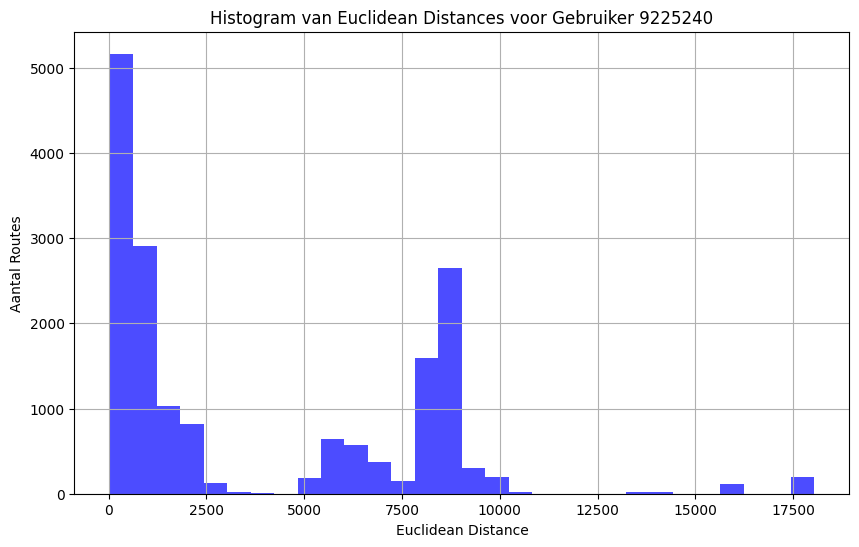

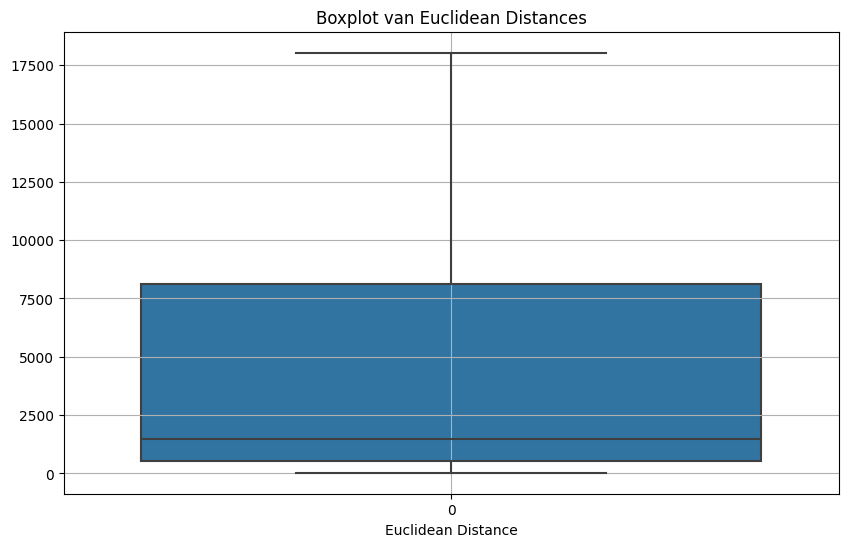

,latitude,longitude,altitude,sport,id,heart_rate,timestamp,speed,distance,altitude_change,userId,average_condition_value,mean_altitude,mean_latitude,mean_longitude,distance_to_user,euclidean_distance
1082,"[55.5808475241065, 55.58081332594156, 55.58070...","[9.708126951009035, 9.707985213026404, 9.70746...","[33.8, 33.8, 33.4, 33.4, 33.4, 33.4, 33.4, 33....",bike,429102808,"[118, 120, 119, 117, 117, 112, 109, 109, 109, ...","[1414246849, 1414246853, 1414246860, 141424686...","[16.1964, 17.0928, 16.776, 12.2796, 15.0156, 1...",15.825838,22.2,260784,6.791561,27.2548,55.585895,9.709026,16.258282,28.691142
1126,"[55.50909080542624, 55.509061217308044, 55.508...","[9.883734108880162, 9.883737964555621, 9.88375...","[0.0, 0.0, 0.6000000000000001, 1.6, 2.4, 2.4, ...",bike,225777933,"[98, 98, 100, 100, 101, 106, 109, 110, 111, 11...","[1375650705, 1375650706, 1375650710, 137565071...","[11.0772, 11.7324, 13.4568, 16.2216, 18.5544, ...",17.759058,27.8,260784,6.791561,4.9628,55.503700,9.836353,4.267134,30.211840
1118,"[55.58085900731385, 55.5809011682868, 55.58104...","[9.706911323592067, 9.706882825121284, 9.70677...","[29.6, 29.6, 29.6, 27.6, 26.4, 25.8, 25.8, 25....",bike,335552251,"[97, 97, 103, 104, 105, 109, 109, 105, 102, 10...","[1399413729, 1399413730, 1399413733, 139941373...","[19.6452, 19.3356, 21.366, 21.6792, 22.8096, 2...",19.512724,21.6,260784,6.791561,24.9864,55.585085,9.687673,17.019872,30.634054
1080,"[55.57131126523018, 55.57140656746924, 55.5716...","[9.737137723714113, 9.737014258280396, 9.73671...","[13.4, 13.4, 13.4, 13.4, 13.4, 14.4, 15.8, 15....",bike,453747948,"[107, 111, 121, 131, 134, 135, 137, 141, 142, ...","[1420306254, 1420306257, 1420306262, 142030626...","[5.6592, 17.2944, 24.7068, 24.1272, 25.1568, 2...",13.655295,28.8,260784,6.791561,22.8376,55.573009,9.733463,14.195687,31.880758
3321,"[55.39293070323765, 55.39293070323765, 55.3929...","[10.364162670448422, 10.364162670448422, 10.36...","[9.4, 9.4, 9.4, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, ...",bike,494160644,"[84, 87, 87, 87, 84, 84, 87, 90, 91, 95, 102, ...","[1424400036, 1424400038, 1424400039, 142440004...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.124753,4.6,3316311,1.247952,11.0568,55.392956,10.364148,32.931714,32.296777


In [2]:
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
from geopy.distance import geodesic
import folium
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns 

# Pad naar de bestanden
user_profiles_path = '../Data/Fietsdata/kleinebestanden/fiets_gebruikersprofielen3.json'
routes_path = '../Data/Fietsdata/kleinebestanden/fietsroutes_aangepast_met_gebruikers.json'

# Stap 1: Laad de gebruikersprofielen en routes

user_profiles_df = pd.read_json(user_profiles_path, lines=True)
routes_df = pd.read_json(routes_path, lines=True)

# Stap 2: Preprocessing van de routegegevens
routes_df['mean_altitude'] = routes_df['altitude'].apply(np.mean)
routes_df['mean_latitude'] = routes_df['latitude'].apply(np.mean)
routes_df['mean_longitude'] = routes_df['longitude'].apply(np.mean)

# Voeg de meest voorkomende locatie van de gebruiker toe aan de DataFrame
user_profiles_df[['most_common_lat', 'most_common_lon']] = pd.DataFrame(user_profiles_df['average_location'].tolist(), index=user_profiles_df.index)


# Stap 3: Bepaal gewichten voor gebruikerskenmerken

gewichten = {}
for index, row in user_profiles_df.iterrows():
    user_id = row['userId']
    altitude_weight = row['weight_std_altitude_change']
    distance_weight = row['weight_std_distance']
    condition_weight = row['weight_std_condition_value']
    gewichten[user_id] = {
        'average_altitude_change': altitude_weight, 
        'average_distance': distance_weight, 
        'average_condition_value': condition_weight,
        'distance_to_user': 1.0}

# Stap 4: Definieer aanbevelingsfunctie voor routes

def recommend_routes_for_user_corrected(user_id, user_profiles_df, routes_df, top_n=10):
    user_data = user_profiles_df[user_profiles_df['userId'] == user_id]
    user_location = (user_data['most_common_lat'].iloc[0], user_data['most_common_lon'].iloc[0])


    # Bereken de afstand tussen de gebruiker en elke route
    def calculate_distance_to_user(row):
        route_location = (row['mean_latitude'], row['mean_longitude'])
        distance_to_user = geodesic(user_location, route_location).kilometers
        return distance_to_user

    routes_df['distance_to_user'] = routes_df.apply(calculate_distance_to_user, axis=1)

    # Functie om de cosine similarity te berekenen
    def calculate_euclidean_distance(row):
        user_values = user_data[['average_altitude_changes', 'average_distances', 'average_condition_value']].values[0]
        route_values = row[['altitude_change', 'distance', 'distance_to_user', 'average_condition_value']]

        # Bereken de gewogen waarden
        gewogen_user_values = np.array([
            user_values[0] * gewichten[user_id]['average_altitude_change'],
            user_values[1] * gewichten[user_id]['average_distance'],
            user_values[2] * gewichten[user_id]['average_condition_value'],
            gewichten[user_id]['distance_to_user']])

        gewogen_route_values = np.array([
            route_values['altitude_change'],
            route_values['distance'],
            route_values['average_condition_value'],
            route_values['distance_to_user']])

        # Euclidische afstand berekenen
        return euclidean(gewogen_user_values, gewogen_route_values)


    # Pas de cosine similarity functie toe en sla de score op
    routes_df['euclidean_distance'] = routes_df.apply(calculate_euclidean_distance, axis=1)
    # Selecteer de routes met de hoogste cosine similarity scores
    recommended_routes = routes_df.sort_values(by='euclidean_distance', ascending=True).head(top_n)

    plt.figure(figsize=(10, 6))
    plt.hist(routes_df['euclidean_distance'], bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram van Euclidean Distances voor Gebruiker {user_id}')
    plt.xlabel('Euclidean Distance')
    plt.ylabel('Aantal Routes')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(routes_df['euclidean_distance'])
    plt.title('Boxplot van Euclidean Distances')
    plt.xlabel('Euclidean Distance')
    plt.grid(True)
    plt.show()

    # Stap 5: Creëer een kaart met de locatie van de gebruiker en de routes
    user_data = user_profiles_df[user_profiles_df['userId'] == sample_user_id].iloc[0]
    user_popup_info = f"UserID: {sample_user_id}<br>" \
                    f"Average Altitude Change: {user_data['average_altitude_changes']}<br>" \
                    f"Average Distance: {user_data['average_distances']}<br>" \
                    f"Average Condition Value: {user_data['average_condition_value']}"

    # Voor satellietbeeld, vervang 'Stamen Terrain' met 'Stamen Toner' of 'Mapbox Satellite'
    # map_obj = folium.Map(location=user_location, zoom_start=12, tiles='Stamen Toner')
    mapbox_tileset = 'https://api.mapbox.com/styles/v1/mapbox/satellite-v9/tiles/256/{z}/{x}/{y}?access_token=pk.eyJ1IjoicnVwYXR0eW4iLCJhIjoiY2xyaWU2NG9nMDd6dzJtcDhwMHp5NWV3biJ9.bHb-trK3I9Z0H2uWRSoWow'
    map_obj = folium.Map(location=user_location, zoom_start=12, tiles=mapbox_tileset, attr='Mapbox')

    folium.Marker(user_location, popup=user_popup_info).add_to(map_obj)

    # Definieer een lijst met kleuren
    colors = ["red", "blue", "green", "purple", "orange"]

    for index, route in enumerate(recommended_routes.iterrows()):
        _, route_data = route
        route_coords = list(zip(route_data['latitude'], route_data['longitude']))
        route_color = colors[index % len(colors)]  # Wijs een kleur toe aan elke route
        route_popup_info = f"Route ID: {route_data['id']}<br>" \
                        f"User ID: {route_data['userId']}<br>" \
                        f"Average Altitude Change: {route_data['altitude_change']}<br>" \
                        f"Average Distance: {route_data['distance']}<br>" \
                        f"Average Condition Value: {route_data['average_condition_value']}"
        folium.PolyLine(route_coords, color=route_color, weight=2.5, opacity=1, popup=route_popup_info).add_to(map_obj)

    display(map_obj)  # Toon de kaart direct


    return recommended_routes


# Stap 6: Test de functie voor een specifieke gebruiker


# sample_user_id = 10921915
# sample_user_id = 13693003
sample_user_id = 9225240
if sample_user_id in gewichten:
    print(f"Gewichten voor gebruiker {sample_user_id}: {gewichten[sample_user_id]}")
else:
    print(f"Geen gewichten gevonden voor gebruiker {sample_user_id}")

recommended_routes = recommend_routes_for_user_corrected(sample_user_id, user_profiles_df, routes_df)

recommended_routes.head()


## code met andere gewichten

Gewichten voor gebruiker 13693003: {'average_altitude_change': 0.69737964372501, 'average_distance': 0.28916997899957003, 'average_condition_value': 0.013450377275419001, 'distance_to_user': 1.0}


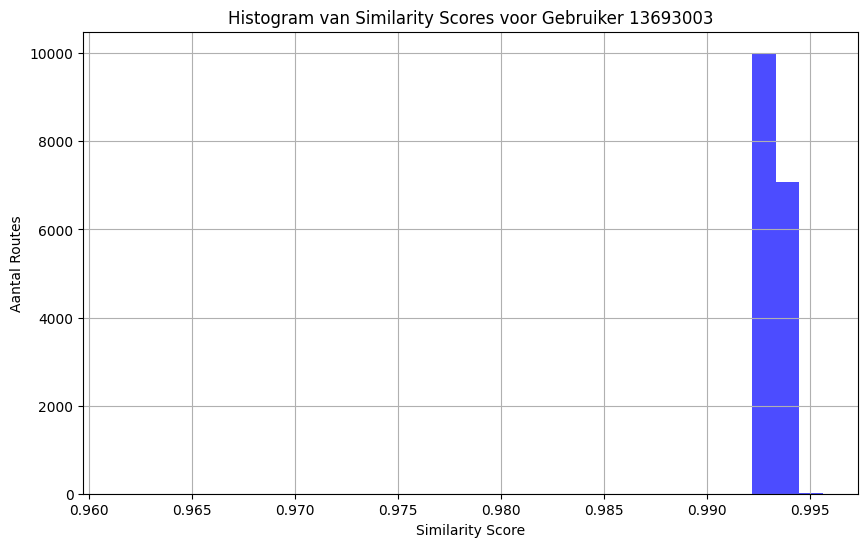

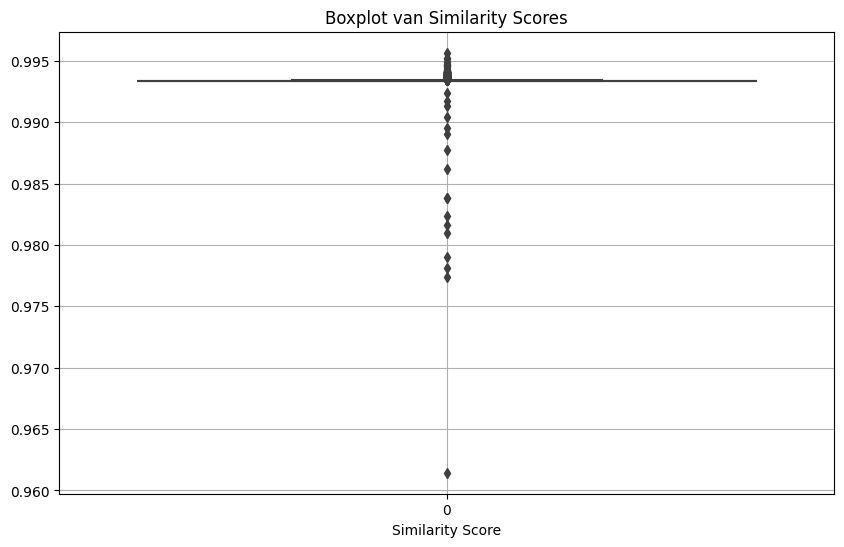

,latitude,longitude,altitude,sport,id,heart_rate,timestamp,speed,distance,altitude_change,...,average_condition_value,mean_altitude,mean_latitude,mean_longitude,orig_altitude_change,orig_distance,orig_mean_altitude,orig_average_condition_value,distance_to_user,similarity_score
440,"[52.45919150300324, 52.45916887186468, 52.4589...","[-0.27179393917322103, -0.27260891161859, -0.2...","[59.8, 59.6, 59.4, 62.6, 63.8, 62.2, 61.8, 66....",bike,628166837,"[79, 80, 90, 104, 116, 111, 107, 102, 106, 109...","[1446665980, 1446665994, 1446666005, 144666602...","[13.5864, 18.7056, 20.052, 18.9324, 20.8548, 2...",0.499181,0.025295,...,0.719292,0.061185,52.496272,-0.466809,97.0,87.169834,63.4908,6.259765,10.450605,0.995651
438,"[52.459101900458336, 52.45896854437888, 52.458...","[-0.272010276094079, -0.273614069446921, -0.27...","[2.6, 4.2, 5.4, 17.8, 19.6, 22.6, 23.4, 22.2, ...",bike,633838769,"[75, 80, 98, 100, 96, 91, 89, 87, 110, 109, 12...","[1447780283, 1447780308, 1447780340, 144778038...","[12.4848, 18.3852, 17.0532, 21.1104, 22.0104, ...",0.530981,0.023365,...,0.719292,0.060685,52.401185,-0.405164,89.6,92.723022,59.5736,6.259765,8.178906,0.995218
448,"[52.458927975967526, 52.45930491015315, 52.458...","[-0.272107673808932, -0.27252291329205003, -0....","[3.2, 4.4, 3.6, 2.4, 2.4, 3.4, 4.8, 3.0, 0.4, ...",bike,581707796,"[76, 82, 92, 87, 95, 104, 108, 100, 103, 104, ...","[1439573322, 1439573335, 1439573358, 143957338...","[11.1492, 16.344, 22.3956, 22.0968, 23.976, 20...",0.461166,0.022531,...,0.719292,0.058796,52.376865,-0.303694,86.4,80.531526,44.7720,6.259765,9.064452,0.995159
15297,"[52.66298482194543, 52.66316754743457, 52.6633...","[-0.6325476989150041, -0.6333653535693881, -0....","[89.0, 91.6, 91.6, 93.6, 91.2, 95.0, 99.0, 102...",bike,401785512,"[163, 162, 165, 168, 168, 168, 175, 173, 172, ...","[1409403755, 1409403771, 1409403788, 140940380...","[9.2988, 11.8224, 24.4476, 25.0128, 38.2788, 2...",0.462218,0.027955,...,0.669339,0.064966,52.638975,-0.638620,107.2,80.715126,93.1248,5.825041,29.265886,0.994885
451,"[52.48362751677632, 52.483164835721254, 52.482...","[-0.475927731022238, -0.47592228278517706, -0....","[41.0, 40.4, 39.8, 39.2, 40.0, 41.4, 41.0, 40....",bike,578163448,"[149, 148, 149, 150, 154, 155, 154, 154, 156, ...","[1439134732, 1439134741, 1439134749, 143913476...","[11.6604, 20.2536, 21.6432, 29.7576, 35.046, 3...",0.331645,0.013351,...,0.719292,0.060917,52.492030,-0.511452,51.2,57.913946,61.3900,6.259765,13.120469,0.994766


In [2]:
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
from geopy.distance import geodesic
import folium
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns 

# Pad naar de bestanden
user_profiles_path = '../Data/Fietsdata/kleinebestanden/gebruikersprofielen.json'
routes_path = '../Data/Fietsdata/kleinebestanden/fietsroutes_aangepast_met_gebruikers.json'

user_profiles_df = pd.read_json(user_profiles_path, lines=True)
routes_df = pd.read_json(routes_path, lines=True)

# Stap 2: Preprocessing van de routegegevens
routes_df['mean_altitude'] = routes_df['altitude'].apply(np.mean)
routes_df['mean_latitude'] = routes_df['latitude'].apply(np.mean)
routes_df['mean_longitude'] = routes_df['longitude'].apply(np.mean)

# Bewaar de originele waarden in aparte kolommen
user_profiles_df['orig_average_speeds'] = user_profiles_df['average_speeds']
user_profiles_df['orig_average_altitude_changes'] = user_profiles_df['average_altitude_changes']
user_profiles_df['orig_average_distances'] = user_profiles_df['average_distances']
user_profiles_df['orig_average_condition_value'] = user_profiles_df['average_condition_value']

routes_df['orig_altitude_change'] = routes_df['altitude_change']
routes_df['orig_distance'] = routes_df['distance']
routes_df['orig_mean_altitude'] = routes_df['mean_altitude']
routes_df['orig_average_condition_value'] = routes_df['average_condition_value']

# Voeg de meest voorkomende locatie van de gebruiker toe aan de DataFrame
user_profiles_df[['most_common_lat', 'most_common_lon']] = pd.DataFrame(user_profiles_df['average_location'].tolist(), index=user_profiles_df.index)

# Normaliseer de kenmerken behalve coördinaten met Min-Max schaling
scaler = MinMaxScaler()
user_profiles_df[['average_speeds', 'average_altitude_changes', 'average_distances', 'average_condition_value']] = scaler.fit_transform(user_profiles_df[['average_speeds', 'average_altitude_changes', 'average_distances', 'average_condition_value']])
routes_df[['altitude_change', 'distance', 'mean_altitude', 'average_condition_value']] = scaler.fit_transform(routes_df[['altitude_change', 'distance', 'mean_altitude', 'average_condition_value']])

# Stap 3: Bepaal gewichten voor gebruikerskenmerken

gewichten = {}
for index, row in user_profiles_df.iterrows():
    user_id = row['userId']
    altitude_weight = row['weight_std_altitude_change']
    distance_weight = row['weight_std_distance']
    condition_weight = row['weight_std_condition_value']
    gewichten[user_id] = {
        'average_altitude_change': altitude_weight, 
        'average_distance': distance_weight, 
        'average_condition_value': condition_weight,
        'distance_to_user': 1.0}

# Stap 4: Definieer aanbevelingsfunctie voor routes

def recommend_routes_for_user_corrected(user_id, user_profiles_df, routes_df, top_n=10):
    user_data = user_profiles_df[user_profiles_df['userId'] == user_id]
    user_location = (user_data['most_common_lat'].iloc[0], user_data['most_common_lon'].iloc[0])


    # Bereken de afstand tussen de gebruiker en elke route
    def calculate_distance_to_user(row):
        route_location = (row['mean_latitude'], row['mean_longitude'])
        distance_to_user = geodesic(user_location, route_location).kilometers
        return distance_to_user

    routes_df['distance_to_user'] = routes_df.apply(calculate_distance_to_user, axis=1)

    # Functie om de cosine similarity te berekenen
    def calculate_cosine_similarity(row):
        user_values = user_data[['average_altitude_changes', 'average_distances', 'average_condition_value']].values[0]
        route_values = row[['altitude_change', 'distance', 'distance_to_user', 'average_condition_value']]

        # Bereken de gewogen waarden
        gewogen_user_values = np.array([
            user_values[0] * gewichten[user_id]['average_altitude_change'],
            user_values[1] * gewichten[user_id]['average_distance'],
            user_values[2] * gewichten[user_id]['average_condition_value'],
            gewichten[user_id]['distance_to_user']])

        gewogen_route_values = np.array([
            route_values['altitude_change'],
            route_values['distance'],
            route_values['average_condition_value'],
            route_values['distance_to_user']])

        # Cosine similarity berekenen
        return cosine_similarity([gewogen_user_values], [gewogen_route_values])[0][0]


    # Pas de cosine similarity functie toe en sla de score op
    routes_df['similarity_score'] = routes_df.apply(calculate_cosine_similarity, axis=1)
# Selecteer de routes met de hoogste cosine similarity scores
    recommended_routes = routes_df.sort_values(by='similarity_score', ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    plt.hist(routes_df['similarity_score'], bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram van Similarity Scores voor Gebruiker {user_id}')
    plt.xlabel('Similarity Score')
    plt.ylabel('Aantal Routes')
    plt.grid(True)
    plt.show()

    # Aan het einde van je script, na het genereren van het histogram
    plt.figure(figsize=(10, 6))
    sns.boxplot(routes_df['similarity_score'])
    plt.title('Boxplot van Similarity Scores')
    plt.xlabel('Similarity Score')
    plt.grid(True)
    plt.show()
    # Stap 5: Creëer een kaart met de locatie van de gebruiker en de routes
    user_data = user_profiles_df[user_profiles_df['userId'] == sample_user_id].iloc[0]
    user_popup_info = f"UserID: {sample_user_id}<br>" \
                    f"Average Altitude Change: {user_data['orig_average_altitude_changes']}<br>" \
                    f"Average Distance: {user_data['orig_average_distances']}<br>" \
                    f"Average Condition Value: {user_data['orig_average_condition_value']}"


    mapbox_tileset = 'https://api.mapbox.com/styles/v1/mapbox/satellite-v9/tiles/256/{z}/{x}/{y}?access_token=pk.eyJ1IjoicnVwYXR0eW4iLCJhIjoiY2xyaWU2NG9nMDd6dzJtcDhwMHp5NWV3biJ9.bHb-trK3I9Z0H2uWRSoWow'
    map_obj = folium.Map(location=user_location, zoom_start=12, tiles=mapbox_tileset, attr='Mapbox')
    folium.Marker(user_location, popup=user_popup_info).add_to(map_obj)

    # Definieer een lijst met kleuren
    colors = ["red", "blue", "green", "purple", "orange"]

    for index, route in enumerate(recommended_routes.iterrows()):
        _, route_data = route
        route_coords = list(zip(route_data['latitude'], route_data['longitude']))
        route_color = colors[index % len(colors)]
        route_popup_info = f"Route ID: {route_data['id']}<br>" \
                        f"User ID: {route_data['userId']}<br>" \
                        f"Altitude Change: {route_data['orig_altitude_change']}<br>" \
                        f"Distance: {route_data['orig_distance']}<br>" \
                        f"Condition Value: {route_data['orig_average_condition_value']}"
        folium.PolyLine(route_coords, color=route_color, weight=2.5, opacity=1, popup=route_popup_info).add_to(map_obj)

    display(map_obj) 

    return recommended_routes


# Stap 6: Test de functie voor een specifieke gebruiker


# sample_user_id = 10921915
sample_user_id = 13693003
# sample_user_id = 9225240
if sample_user_id in gewichten:
    print(f"Gewichten voor gebruiker {sample_user_id}: {gewichten[sample_user_id]}")
else:
    print(f"Geen gewichten gevonden voor gebruiker {sample_user_id}")

recommended_routes = recommend_routes_for_user_corrected(sample_user_id, user_profiles_df, routes_df)

recommended_routes.head()


Gewichten voor gebruiker 13693003: {'average_altitude_change': 0.69737964372501, 'average_distance': 0.28916997899957003, 'average_condition_value': 0.013450377275419001, 'distance_to_user': 1.0}


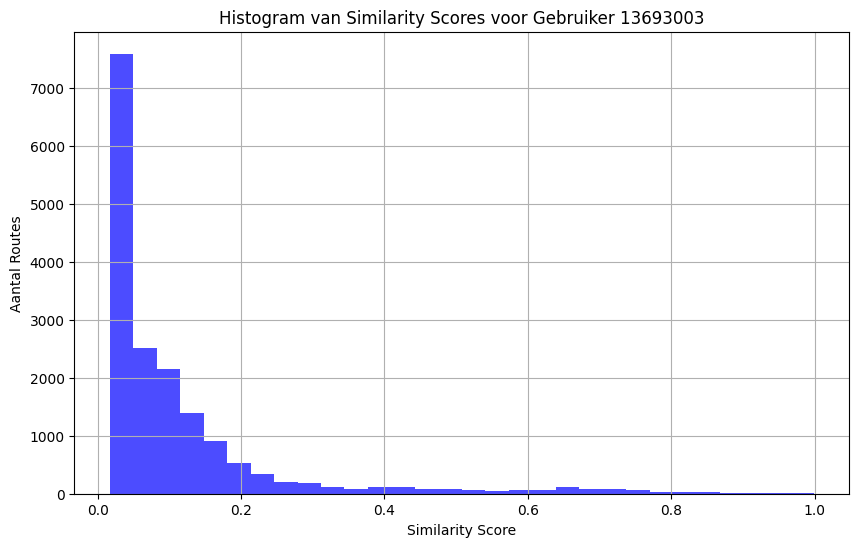

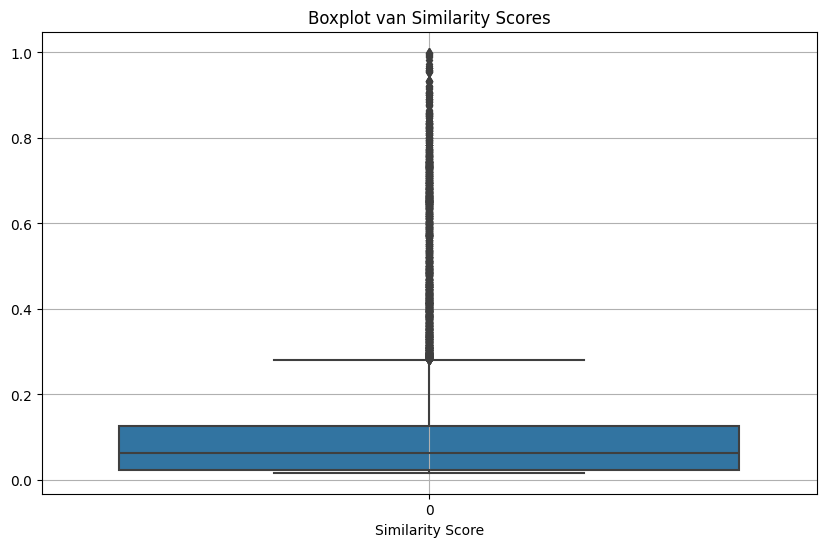

,latitude,longitude,altitude,sport,id,heart_rate,timestamp,speed,distance,altitude_change,userId,average_condition_value,mean_altitude,mean_latitude,mean_longitude,distance_to_user,similarity_score
437,"[52.45956969447434, 52.45946743525565, 52.4591...","[-0.272358125075697, -0.272759702056646, -0.27...","[9.2, 7.6, 4.8, 4.4, 3.6, 3.0, 1.6, 1.2, 2.6, ...",bike,648927182,"[146, 154, 145, 136, 133, 131, 126, 127, 134, ...","[1451235864, 1451235870, 1451235888, 145123589...","[11.3724, 18.9396, 23.9544, 23.7312, 22.8744, ...",58.956277,251.8,13693003,6.259765,24.4372,52.372543,-0.293187,9.683093,0.999282
461,"[52.45804779231548, 52.458038153126836, 52.457...","[-0.27038385160267303, -0.271102096885442, -0....","[-214.8, -213.4, -211.8, -209.0, -208.0, -206....",bike,546561077,"[82, 83, 84, 93, 103, 115, 111, 116, 122, 126,...","[1434897214, 1434897228, 1434897242, 143489725...","[15.3612, 15.8256, 20.07, 25.9632, 25.8408, 26...",64.976494,303.8,13693003,6.259765,39.9340,52.494736,-0.376634,5.378267,0.998963
452,"[52.45890811085701, 52.45892311446369, 52.4590...","[-0.27191933244466704, -0.271936515346169, -0....","[9.6, 9.6, 10.0, 10.2, 10.4, 10.4, 10.4, 10.4,...",bike,578163438,"[76, 76, 77, 80, 83, 83, 82, 80, 82, 83, 86, 8...","[1439127117, 1439127118, 1439127124, 143912712...","[6.858, 6.912, 8.226, 10.3428, 12.6108, 13.039...",20.035268,73.8,13693003,6.259765,50.3104,52.472063,-0.372486,3.510478,0.996285
459,"[52.459084801375866, 52.459206003695726, 52.45...","[-0.27207003906369204, -0.27219140902161604, -...","[1.6, 3.2, 4.2, 4.6, 5.2, 6.4, 7.0, 7.6, 8.6, ...",bike,553353732,"[81, 84, 84, 84, 85, 88, 90, 93, 96, 100, 103,...","[1435795295, 1435795299, 1435795302, 143579530...","[9.1476, 11.5776, 13.014, 13.2588, 14.6808, 17...",19.977705,65.4,13693003,6.259765,44.1860,52.471970,-0.371410,3.441298,0.994444
450,"[52.48314815573394, 52.48314522206783, 52.4831...","[-0.47595798969268804, -0.47590292058885103, -...","[43.2, 43.2, 43.4, 43.4, 43.8, 44.0, 46.4, 46....",bike,578163456,"[98, 98, 99, 100, 103, 106, 109, 111, 113, 116...","[1439149120, 1439149121, 1439149124, 143914912...","[16.6428, 16.578, 15.264, 14.6736, 14.3712, 15...",19.987991,60.4,13693003,6.259765,45.9404,52.472381,-0.373764,3.603691,0.992308


In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
from geopy.distance import geodesic
import folium
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns 

# Pad naar de bestanden
user_profiles_path = '../Data/Fietsdata/kleinebestanden/gebruikersprofielen.json'
routes_path = '../Data/Fietsdata/kleinebestanden/fietsroutes_aangepast_met_gebruikers.json'

user_profiles_df = pd.read_json(user_profiles_path, lines=True)
routes_df = pd.read_json(routes_path, lines=True)

# Stap 2: Preprocessing van de routegegevens
routes_df['mean_altitude'] = routes_df['altitude'].apply(np.mean)
routes_df['mean_latitude'] = routes_df['latitude'].apply(np.mean)
routes_df['mean_longitude'] = routes_df['longitude'].apply(np.mean)

# Voeg de meest voorkomende locatie van de gebruiker toe aan de DataFrame
user_profiles_df[['most_common_lat', 'most_common_lon']] = pd.DataFrame(user_profiles_df['average_location'].tolist(), index=user_profiles_df.index)

# Normaliseer de kenmerken behalve coördinaten met Min-Max schaling
# scaler = MinMaxScaler()
# user_profiles_df[['average_speeds', 'average_altitude_changes', 'average_distances', 'average_condition_value']] = scaler.fit_transform(user_profiles_df[['average_speeds', 'average_altitude_changes', 'average_distances', 'average_condition_value']])
# routes_df[['altitude_change', 'distance', 'mean_altitude', 'average_condition_value']] = scaler.fit_transform(routes_df[['altitude_change', 'distance', 'mean_altitude', 'average_condition_value']])

# Stap 3: Bepaal gewichten voor gebruikerskenmerken

gewichten = {}
for index, row in user_profiles_df.iterrows():
    user_id = row['userId']
    altitude_weight = row['weight_std_altitude_change']
    distance_weight = row['weight_std_distance']
    condition_weight = row['weight_std_condition_value']
    gewichten[user_id] = {
        'average_altitude_change': altitude_weight, 
        'average_distance': distance_weight, 
        'average_condition_value': condition_weight,
        'distance_to_user': 1.0}

# Stap 4: Definieer aanbevelingsfunctie voor routes

def recommend_routes_for_user_corrected(user_id, user_profiles_df, routes_df, top_n=10):
    user_data = user_profiles_df[user_profiles_df['userId'] == user_id]
    user_location = (user_data['most_common_lat'].iloc[0], user_data['most_common_lon'].iloc[0])


    # Bereken de afstand tussen de gebruiker en elke route
    def calculate_distance_to_user(row):
        route_location = (row['mean_latitude'], row['mean_longitude'])
        distance_to_user = geodesic(user_location, route_location).kilometers
        return distance_to_user

    routes_df['distance_to_user'] = routes_df.apply(calculate_distance_to_user, axis=1)

    # Functie om de cosine similarity te berekenen
    def calculate_cosine_similarity(row):
        user_values = user_data[['average_altitude_changes', 'average_distances', 'average_condition_value']].values[0]
        route_values = row[['altitude_change', 'distance', 'distance_to_user', 'average_condition_value']]

        # Bereken de gewogen waarden
        gewogen_user_values = np.array([
            user_values[0] * gewichten[user_id]['average_altitude_change'],
            user_values[1] * gewichten[user_id]['average_distance'],
            user_values[2] * gewichten[user_id]['average_condition_value'],
            gewichten[user_id]['distance_to_user']])

        gewogen_route_values = np.array([
            route_values['altitude_change'],
            route_values['distance'],
            route_values['average_condition_value'],
            route_values['distance_to_user']])

        # Cosine similarity berekenen
        return cosine_similarity([gewogen_user_values], [gewogen_route_values])[0][0]


    # Pas de cosine similarity functie toe en sla de score op
    routes_df['similarity_score'] = routes_df.apply(calculate_cosine_similarity, axis=1)
# Selecteer de routes met de hoogste cosine similarity scores
    recommended_routes = routes_df.sort_values(by='similarity_score', ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    plt.hist(routes_df['similarity_score'], bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram van Similarity Scores voor Gebruiker {user_id}')
    plt.xlabel('Similarity Score')
    plt.ylabel('Aantal Routes')
    plt.grid(True)
    plt.show()

    # Aan het einde van je script, na het genereren van het histogram
    plt.figure(figsize=(10, 6))
    sns.boxplot(routes_df['similarity_score'])
    plt.title('Boxplot van Similarity Scores')
    plt.xlabel('Similarity Score')
    plt.grid(True)
    plt.show()
    # Stap 5: Creëer een kaart met de locatie van de gebruiker en de routes
    user_data = user_profiles_df[user_profiles_df['userId'] == sample_user_id].iloc[0]
    user_popup_info = f"UserID: {sample_user_id}<br>" \
                    f"Average Altitude Change: {user_data['average_altitude_changes']}<br>" \
                    f"Average Distance: {user_data['average_distances']}<br>" \
                    f"Average Condition Value: {user_data['average_condition_value']}"

    # Voor satellietbeeld, vervang 'Stamen Terrain' met 'Stamen Toner' of 'Mapbox Satellite'
    # map_obj = folium.Map(location=user_location, zoom_start=12, tiles='Stamen Toner')
    mapbox_tileset = 'https://api.mapbox.com/styles/v1/mapbox/satellite-v9/tiles/256/{z}/{x}/{y}?access_token=pk.eyJ1IjoicnVwYXR0eW4iLCJhIjoiY2xyaWU2NG9nMDd6dzJtcDhwMHp5NWV3biJ9.bHb-trK3I9Z0H2uWRSoWow'
    map_obj = folium.Map(location=user_location, zoom_start=12, tiles=mapbox_tileset, attr='Mapbox')

    folium.Marker(user_location, popup=user_popup_info).add_to(map_obj)

    # Definieer een lijst met kleuren
    colors = ["red", "blue", "green", "purple", "orange"]

    for index, route in enumerate(recommended_routes.iterrows()):
        _, route_data = route
        route_coords = list(zip(route_data['latitude'], route_data['longitude']))
        route_color = colors[index % len(colors)]  # Wijs een kleur toe aan elke route
        route_popup_info = f"Route ID: {route_data['id']}<br>" \
                        f"User ID: {route_data['userId']}<br>" \
                        f"Average Altitude Change: {route_data['altitude_change']}<br>" \
                        f"Average Distance: {route_data['distance']}<br>" \
                        f"Average Condition Value: {route_data['average_condition_value']}"
        folium.PolyLine(route_coords, color=route_color, weight=2.5, opacity=1, popup=route_popup_info).add_to(map_obj)

    display(map_obj)  # Toon de kaart direct


    return recommended_routes


# Stap 6: Test de functie voor een specifieke gebruiker


# sample_user_id = 10921915
sample_user_id = 13693003
# sample_user_id = 9225240
if sample_user_id in gewichten:
    print(f"Gewichten voor gebruiker {sample_user_id}: {gewichten[sample_user_id]}")
else:
    print(f"Geen gewichten gevonden voor gebruiker {sample_user_id}")

recommended_routes = recommend_routes_for_user_corrected(sample_user_id, user_profiles_df, routes_df)

recommended_routes.head()
